In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')
df=df[['survived','fare','age']]
df

,survived,fare,age
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
...,...,...,...
886,0,13.0000,27.0
887,1,30.0000,19.0
888,0,23.4500,NaN
889,1,30.0000,26.0


In [3]:
df.isnull().mean()*100

survived     0.00000
fare         0.00000
age         19.86532
dtype: float64

In [4]:
X=df.drop('survived',axis=1)
y=df['survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train['age_imputed'] = X_train['age']
X_test['age_imputed'] = X_test['age']
X_train


,fare,age,age_imputed
331,28.5000,45.5,45.5
733,13.0000,23.0,23.0
382,7.9250,32.0,32.0
704,7.8542,26.0,26.0
813,31.2750,6.0,6.0
...,...,...,...
106,7.6500,21.0,21.0
270,31.0000,NaN,NaN
860,14.1083,41.0,41.0
435,120.0000,14.0,14.0


In [7]:
X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
X_test['age_imputed'][X_test['age_imputed'].isnull()]=X_test['age'].dropna().sample(X_test['age'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3984\3078428413.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
C:\

In [8]:
X_train

,fare,age,age_imputed
331,28.5000,45.5,45.5
733,13.0000,23.0,23.0
382,7.9250,32.0,32.0
704,7.8542,26.0,26.0
813,31.2750,6.0,6.0
...,...,...,...
106,7.6500,21.0,21.0
270,31.0000,NaN,36.0
860,14.1083,41.0,41.0
435,120.0000,14.0,14.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3984\787314011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'],label='original',hist=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3984\787314011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['a

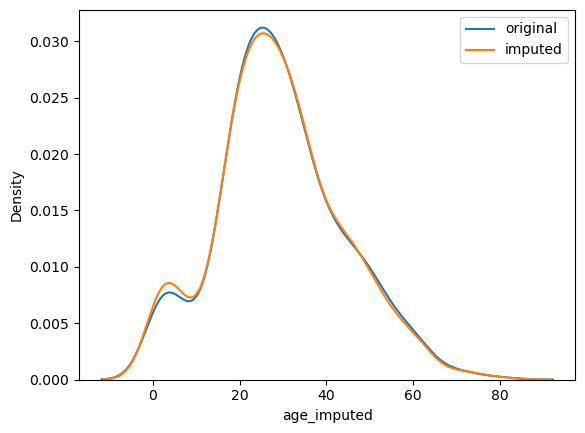

In [9]:
sns.distplot(X_train['age'],label='original',hist=False)
sns.distplot(X_train['age_imputed'],label='imputed',hist=False)

plt.legend()
plt.show()

In [10]:
print('original variable variance:',X_train['age'].var())
print('variance after random imputation:',X_train['age_imputed'].var())

original variable variance: 210.2517072477438
variance after random imputation: 211.3954633282763


In [11]:
X_train[['fare','age','age_imputed']].cov()

,fare,age,age_imputed
fare,2700.831981,71.580633,55.669547
age,71.580633,210.251707,210.251707
age_imputed,55.669547,210.251707,211.395463


<Axes: >

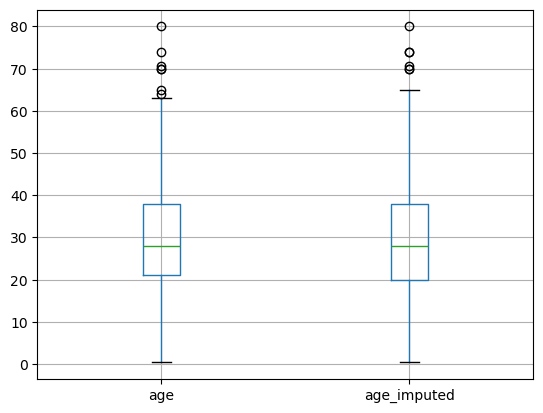

In [12]:
X_train[['age','age_imputed']].boxplot()

### missing Indicator

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator 

In [14]:
df=sns.load_dataset('titanic')
df=df[['age','fare','survived']]

In [15]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [16]:
X=df.drop(columns=['survived'])
y=df['survived']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [18]:
si=SimpleImputer()
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression 

clf=LogisticRegression()

clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6424581005586593

In [20]:
mi=MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [21]:
mi.features_

array([0], dtype=int64)

In [22]:
X_train_missing=mi.transform(X_train)
X_test_missing=mi.transform(X_test)

In [23]:
X_train['age_na']=X_train_missing
X_test['age_na']=X_test_missing

In [24]:
si=SimpleImputer()

X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [25]:
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)

In [26]:
accuracy_score(y_test,y_pred)

0.6480446927374302

In [27]:
# ## shortcut

# si=SimpleImputer(add_indicator=True)